# UK Housing Crisis🏠
## Exploratory Data Analysis🔍
Mark Strathie  
[GitHub URL](https://github.com/markstrathie/data-analysis-portfolio) - May 2024

---

<table><tr>
<td><a href='https://unsplash.com/photos/grayscale-photo-of-concrete-building-TxtIsVjiIZg'><img src="img/london_flats.jpg" alt="London Tower Block"/></a></td>
</tr></table>

<b><i>"Young adults are being robbed of the milestones that marked the lives of previous generations."</i></b>

This quote is from the [Financial Times article](https://www.ft.com/content/f21642d8-da2d-4e75-886e-2b7c1645f063) (published Jan 24) which states that it now takes 13 years to save a deposit for the average UK property (up from 3 in the mid 90s). The inability to afford a home can cause a multitude of problems including overcrowding, long social housing waiting lists, facing the high cost of the private rental market, stress and anxiety about the future, and an overall lower standard of living.

Through this notebook we will analyse property prices across regions of the UK and annual salaries from 1968-2023. We will use open data from UK government websites:

- [House Price Index - Nov 2023](https://www.gov.uk/government/statistical-data-sets/uk-house-price-index-data-downloads-november-2023)
- [Earnings time series of median gross weekly earnings from 1968 to 2023](https://www.ons.gov.uk/employmentandlabourmarket/peopleinwork/earningsandworkinghours/datasets/earningstimeseriesofmediangrossweeklyearningsfrom1968to2022)

At the end of out notebook we will hopefully draw some insights on the UK housing crisis such as how property prices and annual salaries have increased from 1968 to 2023, what areas are the most expensive, and how property price and salaries relate to one another.

We'll go through this project across 6 chapters:

1. Imports and reading data📖
2. Data Understanding☝
3. Data Preparation👷‍♂️
4. Feature Understanding📊
5. Feature Relationships👫
6. Asking questions about our Data🤷‍♂️

While most of the project is contained in this python notebook, I also better visualised regional differences by using Tableau to create a <a href='https://public.tableau.com/app/profile/mark.strathie/viz/shared/R7JH5NRCG'>geographical heatmap</a>.

I also used the findings of this notebook to write a <a href='docs/housing_article.pdf'>data-journalism article</a> on the UK housing crisis in an attempt to better communicate the data story.

Let's get started!🙌

# 1. Imports and Reading Data📖

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#for formatting tick labels
import matplotlib.ticker as mtick

#for line plot interpolation
from scipy.interpolate import make_interp_spline

#setting plot style
plt.style.use('ggplot')

#increasings max columns in pandas
pd.set_option('display.max_columns', 200)

While the UK House Price Index is available as different subsets from the government website, let's read in the full dataset. This will give us more practise at data cleaning and manipulation while we remove the data we don't need.

The 'median gross weekly earnings' dataset was pre-processed by me in Excel. I coverted the weekly percentiles into annual averages for the dataset read in below.

In [5]:
df_housing = pd.read_csv('datasets/UK-HPI-full-file-2023-11.csv')
df_wages = pd.read_csv('datasets/uk_average_wages.csv')

# 2. Data Understanding☝

### a. Property price dataset

In [6]:
df_housing.shape

(138960, 54)

In [7]:
df_housing.head()

,Date,RegionName,AreaCode,AveragePrice,Index,IndexSA,1m%Change,12m%Change,AveragePriceSA,SalesVolume,DetachedPrice,DetachedIndex,Detached1m%Change,Detached12m%Change,SemiDetachedPrice,SemiDetachedIndex,SemiDetached1m%Change,SemiDetached12m%Change,TerracedPrice,TerracedIndex,Terraced1m%Change,Terraced12m%Change,FlatPrice,FlatIndex,Flat1m%Change,Flat12m%Change,CashPrice,CashIndex,Cash1m%Change,Cash12m%Change,CashSalesVolume,MortgagePrice,MortgageIndex,Mortgage1m%Change,Mortgage12m%Change,MortgageSalesVolume,FTBPrice,FTBIndex,FTB1m%Change,FTB12m%Change,FOOPrice,FOOIndex,FOO1m%Change,FOO12m%Change,NewPrice,NewIndex,New1m%Change,New12m%Change,NewSalesVolume,OldPrice,OldIndex,Old1m%Change,Old12m%Change,OldSalesVolume
0,01/01/2004,Aberdeenshire,S12000034,81693.66964,40.864214,NaN,NaN,NaN,NaN,388.0,122490.0641,43.610982,NaN,NaN,70563.15784,40.821887,NaN,NaN,55319.63336,38.305671,NaN,NaN,48016.07412,42.433549,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88436.13953,40.267250,NaN,NaN,103.0,81043.95084,40.883367,NaN,NaN,285.0
1,01/02/2004,Aberdeenshire,S12000034,81678.76231,40.856757,NaN,-0.018248,NaN,NaN,326.0,121280.8840,43.180469,-0.987166,NaN,70804.42408,40.961464,0.341915,NaN,55720.07531,38.582954,0.723869,NaN,49030.18133,43.329752,2.112016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88606.44649,40.344795,0.192576,NaN,107.0,80965.29542,40.843688,-0.097053,NaN,219.0
2,01/03/2004,Aberdeenshire,S12000034,83525.09702,41.780317,NaN,2.260483,NaN,NaN,453.0,123395.4269,43.933325,1.743509,NaN,72689.07253,42.051762,2.661767,NaN,57362.85925,39.720488,2.948280,NaN,50349.44771,44.495636,2.690723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90296.91375,41.114508,1.907838,NaN,140.0,82903.23948,41.821302,2.393549,NaN,313.0
3,01/04/2004,Aberdeenshire,S12000034,84333.67900,42.184780,NaN,0.968071,NaN,NaN,571.0,122334.0258,43.555427,-0.860162,NaN,74484.23119,43.090289,2.469640,NaN,59193.39722,40.988030,3.191155,NaN,51736.22329,45.721180,2.754301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90319.87844,41.124964,0.025432,NaN,180.0,84003.99161,42.376586,1.327755,NaN,391.0
4,01/05/2004,Aberdeenshire,S12000034,86379.95396,43.208353,NaN,2.426403,NaN,NaN,502.0,124498.8747,44.326193,1.769621,NaN,76637.73414,44.336124,2.891220,NaN,61202.79629,42.379424,3.394634,NaN,53230.23061,47.041488,2.887739,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91989.17763,41.885039,1.848208,NaN,167.0,86222.73484,43.495852,2.641235,NaN,335.0


Our housing data is sampled per region on a monthly basis.

In [8]:
df_housing.columns

Index(['Date', 'RegionName', 'AreaCode', 'AveragePrice', 'Index', 'IndexSA',
       '1m%Change', '12m%Change', 'AveragePriceSA', 'SalesVolume',
       'DetachedPrice', 'DetachedIndex', 'Detached1m%Change',
       'Detached12m%Change', 'SemiDetachedPrice', 'SemiDetachedIndex',
       'SemiDetached1m%Change', 'SemiDetached12m%Change', 'TerracedPrice',
       'TerracedIndex', 'Terraced1m%Change', 'Terraced12m%Change', 'FlatPrice',
       'FlatIndex', 'Flat1m%Change', 'Flat12m%Change', 'CashPrice',
       'CashIndex', 'Cash1m%Change', 'Cash12m%Change', 'CashSalesVolume',
       'MortgagePrice', 'MortgageIndex', 'Mortgage1m%Change',
       'Mortgage12m%Change', 'MortgageSalesVolume', 'FTBPrice', 'FTBIndex',
       'FTB1m%Change', 'FTB12m%Change', 'FOOPrice', 'FOOIndex', 'FOO1m%Change',
       'FOO12m%Change', 'NewPrice', 'NewIndex', 'New1m%Change',
       'New12m%Change', 'NewSalesVolume', 'OldPrice', 'OldIndex',
       'Old1m%Change', 'Old12m%Change', 'OldSalesVolume'],
      dtype='object

We can drop most of these columns later. The only ones we are interested in for this initial analysis are Date, RegionName, and AveragePrice.

In [9]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138960 entries, 0 to 138959
Data columns (total 54 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Date                    138960 non-null  object 
 1   RegionName              138960 non-null  object 
 2   AreaCode                138960 non-null  object 
 3   AveragePrice            138960 non-null  float64
 4   Index                   138960 non-null  float64
 5   IndexSA                 4869 non-null    float64
 6   1m%Change               138536 non-null  float64
 7   12m%Change              134148 non-null  float64
 8   AveragePriceSA          4869 non-null    float64
 9   SalesVolume             134493 non-null  float64
 10  DetachedPrice           132459 non-null  float64
 11  DetachedIndex           132459 non-null  float64
 12  Detached1m%Change       132069 non-null  float64
 13  Detached12m%Change      127803 non-null  float64
 14  SemiDetachedPrice   

We will need to convert the Date field from an object to a datetime datatype. All Dates, Regions and Prices are non-null which indicates our data is of high quality. We will perform further data validation in the next step.

In [10]:
df_housing.describe()

,AveragePrice,Index,IndexSA,1m%Change,12m%Change,AveragePriceSA,SalesVolume,DetachedPrice,DetachedIndex,Detached1m%Change,Detached12m%Change,SemiDetachedPrice,SemiDetachedIndex,SemiDetached1m%Change,SemiDetached12m%Change,TerracedPrice,TerracedIndex,Terraced1m%Change,Terraced12m%Change,FlatPrice,FlatIndex,Flat1m%Change,Flat12m%Change,CashPrice,CashIndex,Cash1m%Change,Cash12m%Change,CashSalesVolume,MortgagePrice,MortgageIndex,Mortgage1m%Change,Mortgage12m%Change,MortgageSalesVolume,FTBPrice,FTBIndex,FTB1m%Change,FTB12m%Change,FOOPrice,FOOIndex,FOO1m%Change,FOO12m%Change,NewPrice,NewIndex,New1m%Change,New12m%Change,NewSalesVolume,OldPrice,OldIndex,Old1m%Change,Old12m%Change,OldSalesVolume
count,1.389600e+05,138960.000000,4869.000000,138536.000000,134148.000000,4869.000000,134493.000000,1.324590e+05,132459.000000,132069.000000,127803.000000,1.324590e+05,132459.000000,132069.000000,127803.000000,1.324860e+05,132486.000000,132096.000000,127830.000000,1.328060e+05,132806.000000,132415.000000,128138.000000,5.605600e+04,56056.000000,55666.000000,51376.000000,55270.000000,5.605600e+04,56056.000000,55666.000000,51376.000000,55271.000000,5.645200e+04,56452.000000,56062.000000,51772.000000,5.605600e+04,56056.000000,55666.000000,51376.000000,1.317420e+05,131946.000000,131555.000000,127278.000000,129693.000000,1.320180e+05,132018.000000,131627.000000,127350.000000,132004.000000
mean,1.761369e+05,84.776851,87.370473,0.557377,6.522500,165182.040164,1251.893994,3.135082e+05,86.595317,0.501459,6.475625,2.004202e+05,85.961687,0.512729,6.605404,1.584039e+05,85.097921,0.511919,6.637709,1.200181e+05,86.970618,0.439147,5.728758,2.405806e+05,115.763915,0.373059,4.795978,329.052614,2.523053e+05,116.488947,0.390946,5.031461,726.062564,2.067252e+05,115.671312,0.374309,4.788818,2.821394e+05,116.703023,0.393657,5.071067,2.115912e+05,87.173995,0.555949,6.873363,130.996147,1.777623e+05,85.294770,0.501276,6.475815,1138.759462
std,1.205824e+05,37.600606,34.695546,1.967498,8.771711,87056.033100,7689.400051,2.773725e+05,36.441588,1.723749,7.976818,2.110646e+05,36.895380,1.710714,8.376928,1.540286e+05,36.801101,1.750598,8.718759,9.309587e+04,33.216733,1.786149,9.093673,1.370980e+05,20.208848,1.490263,4.911440,2028.926373,1.364804e+05,21.156444,1.485377,4.942783,4457.783013,1.160754e+05,20.357231,1.502540,4.984532,1.556625e+05,21.352024,1.488260,4.935832,1.272844e+05,37.957052,1.803121,8.203071,820.427135,1.196736e+05,35.643878,1.750978,8.513894,6971.602084
min,2.712016e+03,1.096815,18.312610,-30.297781,-35.786566,40405.313840,2.000000,4.064610e+04,12.494361,-19.628465,-30.193434,2.571306e+04,12.154658,-19.668017,-29.358801,2.045985e+04,11.763214,-19.960934,-29.446217,1.619875e+04,9.865796,-30.295111,-28.871988,5.675315e+04,59.441426,-19.179237,-27.700000,1.000000,6.776312e+04,59.359389,-19.090431,-27.904537,0.000000,5.671877e+04,59.295986,-19.083397,-28.280807,6.941035e+04,59.478588,-19.133937,-27.500000,2.722990e+04,9.708894,-29.816368,-28.851244,0.000000,2.278638e+04,10.097461,-30.587732,-30.341125,2.000000
25%,9.874998e+04,49.855080,62.079770,-0.435076,1.464248,114782.551900,141.000000,1.705557e+05,55.608093,-0.445629,1.700000,1.057692e+05,53.170862,-0.416139,1.709900,8.289313e+04,50.865817,-0.451035,1.520572,6.820269e+04,58.105194,-0.538713,0.158677,1.472891e+05,100.000000,-0.427214,1.454760,39.000000,1.572931e+05,100.000000,-0.400449,1.693259,86.000000,1.308584e+05,99.916852,-0.424328,1.421675,1.740487e+05,100.000000,-0.402020,1.719812,1.272426e+05,55.095452,-0.442578,2.117844,9.000000,1.015668e+05,53.185331,-0.441600,1.457919,127.000000
50%,1.522365e+05,90.673736,92.249684,0.513292,5.609383,154282.978800,217.000000,2.467760e+05,90.137270,0.493767,5.716014,1.547000e+05,90.458968,0.501389,5.700000,1.241039e+05,90.953619,0.500509,5.700000,1.007303e+05,95.198341,0.414676,4.542708,2.052526e+05,114.700000,0.384354,4.422052,60.000000,2.159456e+05,115.012595,0.400000,4.590217,133.000000,1.767365e+05,114.550873,0.387842,4.405218,2.391905e+05,115.075353,0.400000,4.6

Initial look at AveragePrice Column:

Mean - £176,137  
Min - £2,712  
Max- £1,517,127

### b. Annual salary dataset

In [11]:
df_wages.shape

(55, 2)

In [12]:
df_wages.head()

,Date,AverageSalary
0,1968,727.48
1,1970,839.41
2,1971,930.41
3,1972,1041.43
4,1973,1181.70


Our wages dataframe simply contains 1 yearly sample for Britain (excludes Northern Ireland). And the year 1969 is missing.

In [13]:
df_wages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           55 non-null     int64  
 1   AverageSalary  55 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1008.0 bytes


Both are all non-null, therefore no missing values identified. This 'Date' field is simply a year so it has been parsed as a numeric int64 format. We will convert this to datetime in the next step.

In [14]:
df_wages.describe()

,Date,AverageSalary
count,55.000000,55.000000
mean,1995.981818,13024.192727
std,16.052565,8635.476196
min,1968.000000,727.480000
25%,1982.500000,4859.530000
50%,1996.000000,12656.800000
75%,2009.500000,21181.300000
max,2023.000000,29001.200000


Years go from 1968 (min) to 2023 (max).

# 3. Data Preperation👷‍♂️

- Dropping irrelevant columns and rows
- Identifying duplicated columns
- Renaming columns

### a. Property price dataset

Dropping irrelevant columns:

In [15]:
df_housing = df_housing[['Date', 'RegionName',
            # 'AreaCode',
            'AveragePrice', 
            # Index', 'IndexSA',
            # '1m%Change', '12m%Change', 'AveragePriceSA', 'SalesVolume',
            # 'DetachedPrice', 'DetachedIndex', 'Detached1m%Change',
            # 'Detached12m%Change', 'SemiDetachedPrice', 'SemiDetachedIndex',
            # 'SemiDetached1m%Change', 'SemiDetached12m%Change', 'TerracedPrice',
            # 'TerracedIndex', 'Terraced1m%Change', 'Terraced12m%Change', 'FlatPrice',
            # 'FlatIndex', 'Flat1m%Change', 'Flat12m%Change', 'CashPrice',
            # 'CashIndex', 'Cash1m%Change', 'Cash12m%Change', 'CashSalesVolume',
            # 'MortgagePrice', 'MortgageIndex', 'Mortgage1m%Change',
            # 'Mortgage12m%Change', 'MortgageSalesVolume', 'FTBPrice', 'FTBIndex',
            # 'FTB1m%Change', 'FTB12m%Change', 'FOOPrice', 'FOOIndex', 'FOO1m%Change',
            # 'FOO12m%Change', 'NewPrice', 'NewIndex', 'New1m%Change',
            # 'New12m%Change', 'NewSalesVolume', 'OldPrice', 'OldIndex',
            # 'Old1m%Change', 'Old12m%Change', 'OldSalesVolume'
            ]].copy()

Converting property prices 'Date' field to datetime format:

In [16]:
df_housing['Date'] = pd.to_datetime(df_housing['Date'], format='%d/%m/%Y')

Rounding to 2 decimal places for currency:

In [17]:
df_housing = df_housing.round(2)

Renaming our columns:

In [18]:
df_housing= df_housing.rename(columns={'RegionName':'Region_Name',
                            'AveragePrice':'Average_Price'})

Checking for null values:

In [19]:
df_housing.isna().sum()

Date             0
Region_Name      0
Average_Price    0
dtype: int64

Checking for duplicates:

In [20]:
df_housing.loc[df_housing.duplicated()]

,Date,Region_Name,Average_Price


In [21]:
df_housing.loc[df_housing.duplicated(subset=['Region_Name'])]

,Date,Region_Name,Average_Price
1,2004-02-01,Aberdeenshire,81678.76
2,2004-03-01,Aberdeenshire,83525.10
3,2004-04-01,Aberdeenshire,84333.68
4,2004-05-01,Aberdeenshire,86379.95
5,2004-06-01,Aberdeenshire,89267.61
...,...,...,...
138955,2023-07-01,Yorkshire and The Humber,209027.00
138956,2023-08-01,Yorkshire and The Humber,212427.00
138957,2023-09-01,Yorkshire and The Humber,208233.00
138958,2023-10-01,Yorkshire and The Humber,209545.00


In [22]:
df_housing.duplicated(subset=['Region_Name']).sum()

138555

Average price is recorded for regions at monthly intervals, so there will exist duplicates (138,555) in the region names. Instead, let's make sure there are no duplicates for both region name AND date:

In [23]:
df_housing.loc[df_housing.duplicated(subset=['Date','Region_Name'])]

,Date,Region_Name,Average_Price


Dataset is cleaned and ready for analysis. There are no null values or duplicated rows. We have dropped unnecessary columns and renamed our column labels to avoid spaces and maintain consistency.

### b. Annual salary dataset

Converting Date to datetime format to match property price dataset:

In [24]:
#format is specifiying format is year only
df_wages['Date'] = pd.to_datetime(df_wages['Date'], format="%Y")

Rounding to 2 decimal places for currency:

In [25]:
df_wages = df_wages.round(2)

Renaming our columns:

In [26]:
df_wages = df_wages.rename(columns={'AverageSalary':'Average_Salary'})

Checking for null values:

In [27]:
df_wages.isna().sum()

Date              0
Average_Salary    0
dtype: int64

Checking for duplicates:

In [28]:
df_wages.loc[df_wages.duplicated()]

,Date,Average_Salary


In [29]:
df_wages.loc[df_wages.duplicated(subset=['Date'])]

,Date,Average_Salary


Dataset is cleaned. No null values or duplicated rows. Again we renamed our column labels to avoid spaces and maintain consistency. Now the real fun begins!

# 4. Feature Understanding📊

(Univariate analysis)

- Plotting Feature Distributions
    - Histogram
    - KDE

### a. Property price dataset

Check range of Date field now that it's converted to datetime:

In [30]:
df_housing['Date'].min()

Timestamp('1968-04-01 00:00:00')

In [31]:
df_housing['Date'].max()

Timestamp('2023-11-01 00:00:00')

This ranges from 1968 to 2023 which matches the date range of our wages dataset. We can analyse the relationship between property price and wages later on in our notebook.

Count regions contained in dataset:

In [32]:
len(df_housing['Region_Name'].unique())

405

Dataset contains 405 unique regions. Let's see what they are, along with a count for each:

In [33]:
df_housing['Region_Name'].value_counts()

Region_Name
Yorkshire and The Humber    668
West Midlands Region        668
Wales                       668
East Midlands               668
Scotland                    668
                           ... 
Derry City and Strabane     227
Ards and North Down         227
Antrim and Newtownabbey     227
Fermanagh and Omagh         227
Causeway Coast and Glens    227
Name: count, Length: 405, dtype: int64

The regions with the most occurences (668) are at the top of our list. Regions seem to have been sampled on a monthly basis from April 1968 to November 2023. Other regions with a lower count are smaller areas and may not have had prices sampled as frequently or for as long a range.

Let's pick 2 specific years to analyse further. My parent's bought their first house in 1976, so let's look at that in comparison to 2023.

First let's find out the UK average for each year, along with the number of regions sampled.

In [34]:
df_housing.query('Date == "2023-01-01" and Region_Name == "United Kingdom"')

,Date,Region_Name,Average_Price
122240,2023-01-01,United Kingdom,285759.0


In [35]:
df_housing.query('Date == "1976-01-01" and Region_Name == "United Kingdom"')

,Date,Region_Name,Average_Price
121676,1976-01-01,United Kingdom,10012.08


In [36]:
len(df_housing.loc[(df_housing['Date'] == '2023-01-01')])

405

In [37]:
len(df_housing.loc[(df_housing['Date'] == '1976-01-01')])

10

Average UK Property Price
- 01/01/2023: £285,756.00
- 01/01/1976: £10,012.08

Number of regions sampled
- 01/01/2023: 405
- 01/01/1976: 10

Wow! The average property price has increased drastically since 1976. Almost 30x. Now let's look at the distribution of average property price across regions. The data from 1976 only has 10 regions, so unfortunately won't be as detailed.

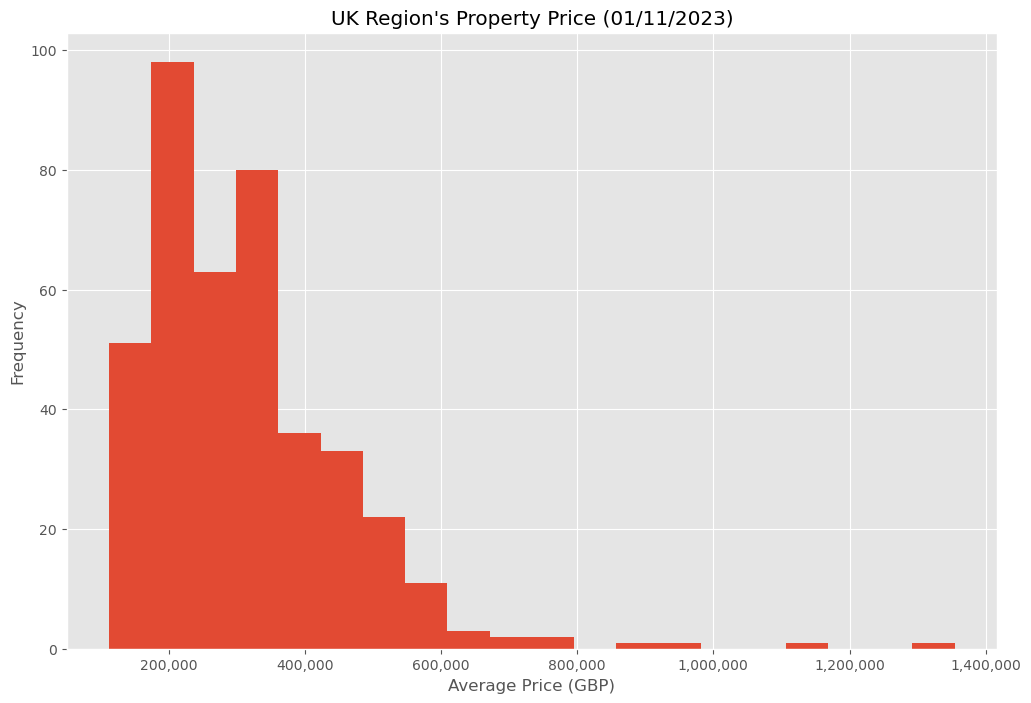

In [38]:
#plotting a histogram
ax = df_housing.loc[(df_housing['Date'] == '2023-01-01')] \
    ['Average_Price'] \
    .plot(kind='hist',
          bins=20,
          title="UK Region's Property Price (01/11/2023)",
          figsize=(12,8),
          legend=None)

#removing scientific notation
ax.ticklabel_format(style='plain', axis='x')

#formatting x-axis tick labels to include commas as thousands separators
ax.get_xaxis().set_major_formatter(mtick.FuncFormatter(lambda x, p: format(int(x), ',')))

ax.set_xlabel('Average Price (GBP)')
plt.show()

Most region's average property price is 200-300,000 in 2023. The outlier at over £1.2 million could be interesting to look at:

In [39]:
df_housing.query('Date == "2023-01-01" and Average_Price > 1200000')

,Date,Region_Name,Average_Price
61381,2023-01-01,Kensington and Chelsea,1354343.0


The Royal Borough of Kensington and Chelsea is a small borough located in London and contains many of the most expensive residential properties in the world.

<table><tr>
<td><a href='https://unsplash.com/photos/a-city-street-filled-with-lots-of-tall-buildings-eA-8nix5uiM'><img src="img/kensington.jpg" alt="Kensington High Street, London"/></a></td>
</tr></table>

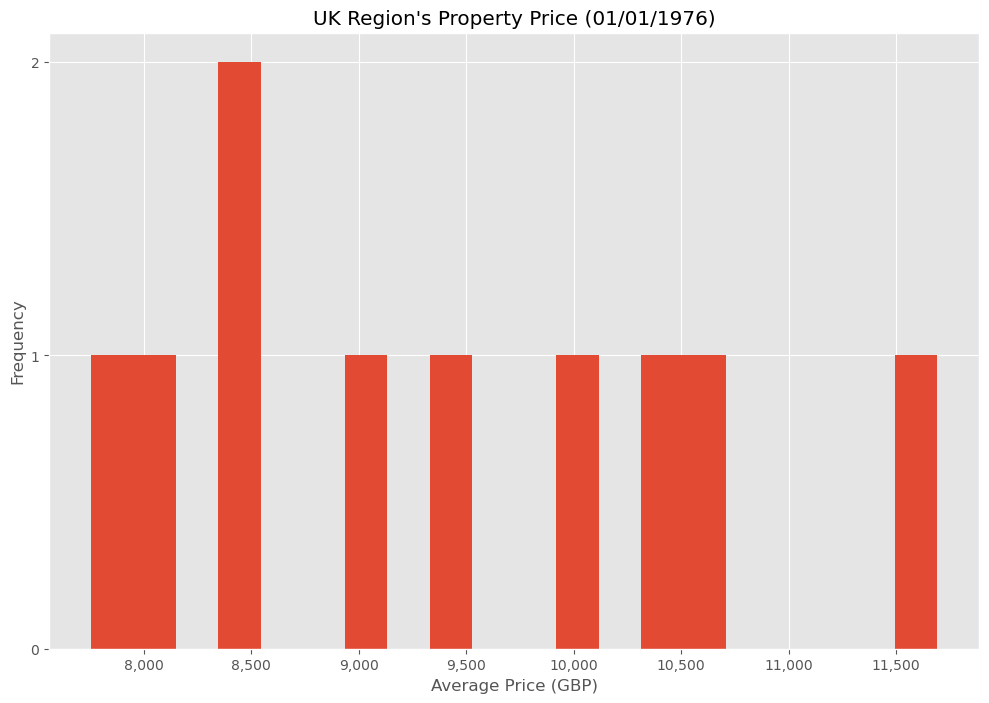

In [40]:
ax = df_housing.loc[(df_housing['Date'] == '01-01-1976')] \
['Average_Price'] \
    .plot(kind='hist',
          bins=20,
          title="UK Region's Property Price (01/01/1976)",
          figsize=(12,8),
          legend=None)

#setting y axis ticks as only runs from 0-2 due to small number of regions
ax.set_yticks([0,1,2])

ax.get_xaxis().set_major_formatter(mtick.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_xlabel('Average Price (GBP)')
plt.show()

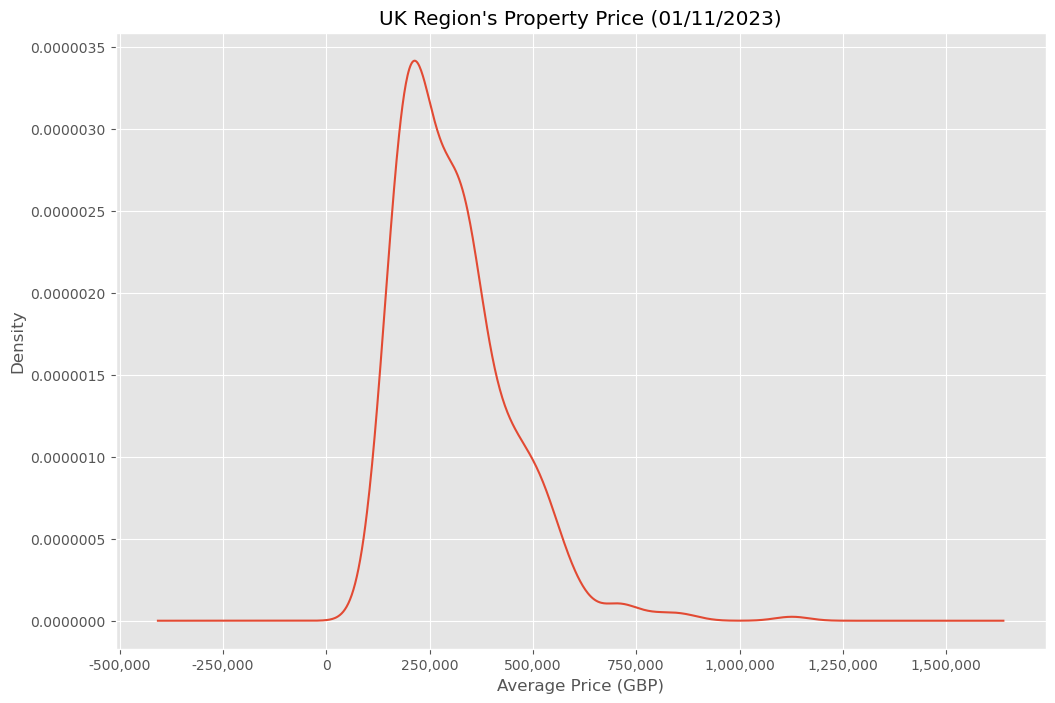

In [41]:
#plotting kernal density estimation plot
ax = df_housing.loc[(df_housing['Date'] == '2023-11-01')] \
    ['Average_Price'] \
    .plot(kind='kde',
          title="UK Region's Property Price (01/11/2023)",
          figsize=(12,8),
          legend=None)

ax.ticklabel_format(style='plain')
ax.get_xaxis().set_major_formatter(mtick.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_xlabel('Average Price (GBP)')
plt.show()

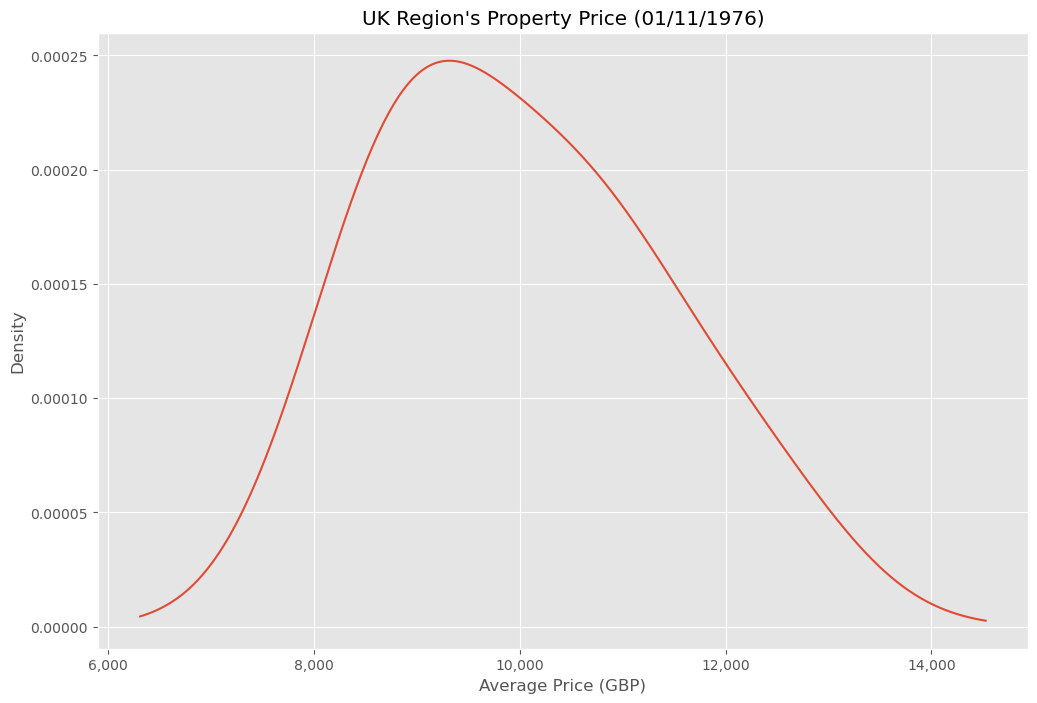

In [42]:
ax = df_housing.loc[(df_housing['Date'] == '1976-11-01')] \
    ['Average_Price'] \
    .plot(kind='kde',
          title="UK Region's Property Price (01/11/1976)",
          figsize=(12,8),
          legend=None)

ax.set_xlabel('Average Price (GBP)')
ax.get_xaxis().set_major_formatter(mtick.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.show()

### b. Annual salary dataset

To compare the average property prices against salary, let's find the average annual salary from the year 2023 and 1976. This will give more context to our property price information.

In [43]:
df_wages.loc[(df_wages['Date'] == '2023-01-01')]

,Date,Average_Salary
54,2023-01-01,29001.2


In [44]:
df_wages.loc[(df_wages['Date'] == '1976-01-01')]

,Date,Average_Salary
7,1976-01-01,2165.41


In [45]:
#2023 property price divided by mean 2023 salary
285759.0 / 29001.2

9.853350895825

In [46]:
#1976 property price divided by mean 1976 salary
10012.0842 / 2165.41

4.62364365177957

In 1976, the average UK property price was 4.6x the average annual salary. In 2023, this is risen to 9.9x. This echos the statement about the unaffordability of homes made in the [Financial Times article](https://www.ft.com/content/f21642d8-da2d-4e75-886e-2b7c1645f063).

Now let's move on to the next part for even more fun!

# 5. Feature Relationships👫

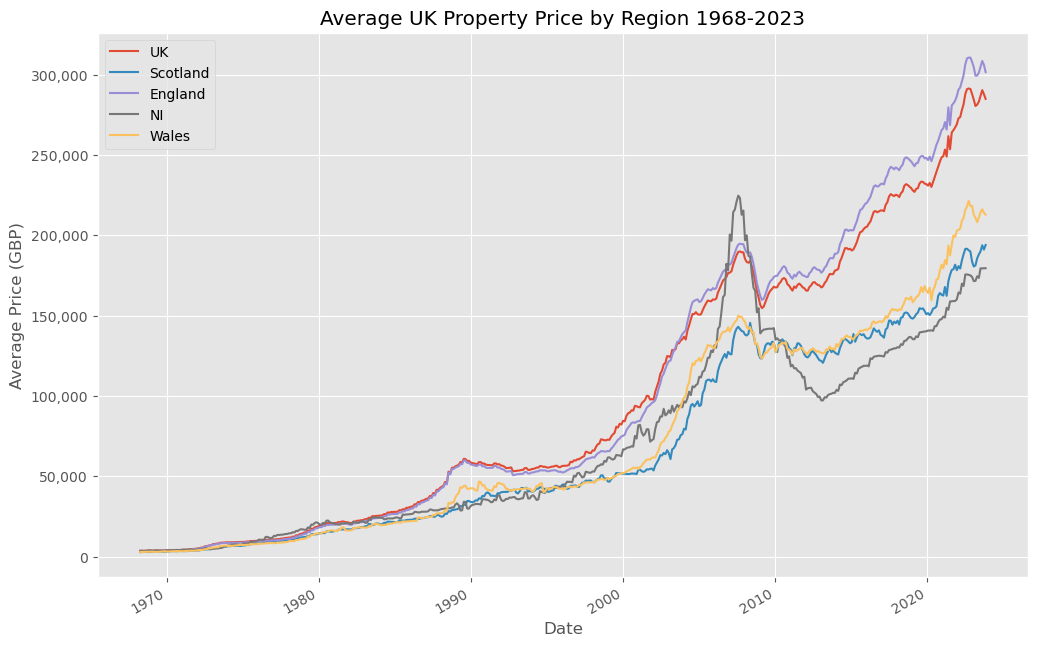

In [47]:
#defining our interpolation function (for smoother lines on our plots)
def interpolate_series(series, num_points=500):
    x = np.arange(series.index.size)
    y = series.values
    spline = make_interp_spline(x, y, k=3)  #k=3 for cubic spline
    x_smooth = np.linspace(x.min(), x.max(), num_points)
    y_smooth = spline(x_smooth)
    return pd.Series(y_smooth, index=pd.date_range(start=series.index.min(), end=series.index.max(), periods=num_points))

#interpolate the data
uk_interpolated = interpolate_series(df_housing.loc[(df_housing['Region_Name'] == 'United Kingdom')] \
                                     .set_index('Date')['Average_Price'])
scotland_interpolated = interpolate_series(df_housing.loc[(df_housing['Region_Name'] == 'Scotland')] \
                                           .set_index('Date')['Average_Price'])
england_interpolated = interpolate_series(df_housing.loc[(df_housing['Region_Name'] == 'England')] \
                                          .set_index('Date')['Average_Price'])
ni_interpolated = interpolate_series(df_housing.loc[(df_housing['Region_Name'] == 'Northern Ireland')] \
                                     .set_index('Date')['Average_Price'])
wales_interpolated = interpolate_series(df_housing.loc[(df_housing['Region_Name'] == 'Wales')] \
                                        .set_index('Date')['Average_Price'])

#plotting
ax = uk_interpolated.plot(kind='line',
                          label='UK',
                          title='Average UK Property Price by Region 1968-2023',
                          figsize=(12,8),
                          legend=True)
scotland_interpolated.plot(ax=ax, label='Scotland', legend=True)
england_interpolated.plot(ax=ax, label='England', legend=True)
ni_interpolated.plot(ax=ax, label='NI', legend=True)
wales_interpolated.plot(ax=ax, label='Wales', legend=True)

ax.set_xlabel('Date')
ax.set_ylabel('Average Price (GBP)')
ax.get_yaxis().set_major_formatter(mtick.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.show()

We can clearly see the average house price has shot up dramatically from 1968. The graph shows big booms around the late 80s ([Lawson Boom](https://en.wikipedia.org/wiki/Lawson_Boom)) and early 2000s ([00s Boom](https://land.tech/blog/housing-booms-and-busts-since-1975)), followed by a crash after the 2007-2008 financial crisis. We can see that now house prices are highest in England, sitting at around 300k. The UK average is around 280k, followed by Wales at 210k, Scotland 190k, and NI at 180k.

An interesting observation from this plot is that Northern Ireland went from being the cheapest region of the UK around 1992, to the most expensive region of the UK in 2008, then back to the cheapest region again around 2011, where it has remained since.

<table><tr>
<td><a href='https://unsplash.com/photos/city-skyline-across-body-of-water-during-sunset-6TGHzkEFT6Y'><img src="img/belfast.jpg" alt="Belfast"/></a></td>
</tr></table>

This seems to be related to the [Celtic Tiger](https://en.wikipedia.org/wiki/Celtic_Tiger) and [Irish property bubble](https://en.wikipedia.org/wiki/Irish_property_bubble) causing a long-term price increase of real estate which then crashed after the 2007-2008 financial crisis.

Now let's pull out the data from 1976 to compare it directly to the prices in 2023.

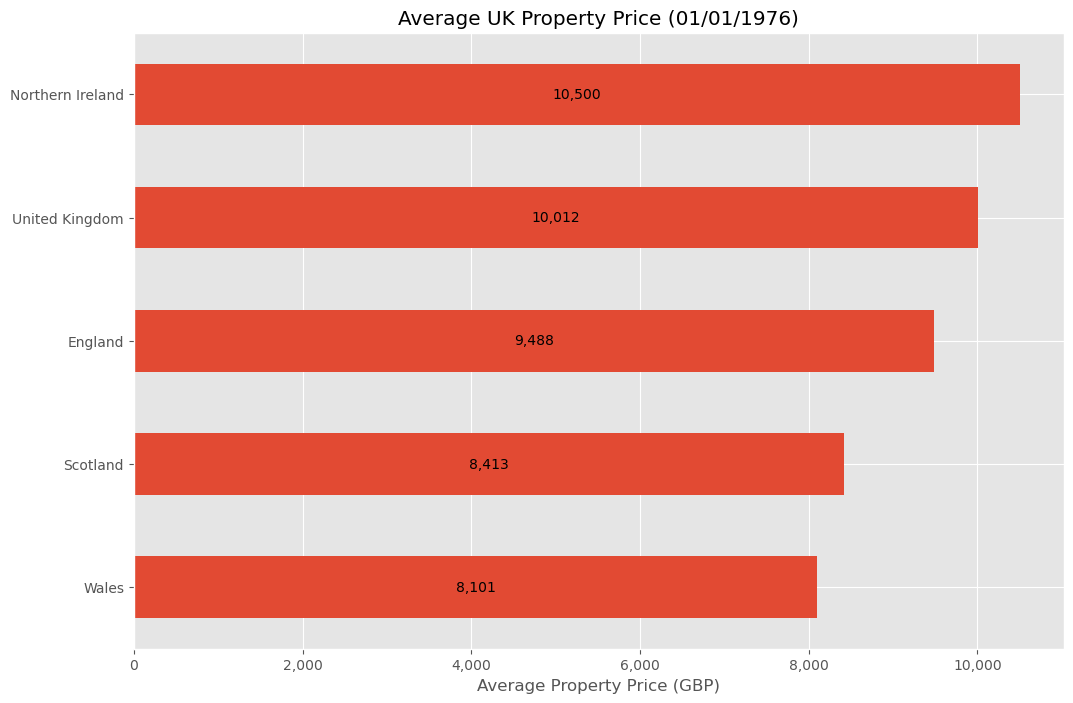

In [48]:
#writing function to plot based on date input
def barh_prices_by_region(date):
      ax = df_housing.query('Date == @date \
            and Region_Name in ["United Kingdom", "Scotland", "England", "Northern Ireland", "Wales"]') \
                  .sort_values('Average_Price') \
                        .plot(kind='barh',
                        x='Region_Name',
                        y='Average_Price',
                        figsize=(12, 8),
                        title=f'Average UK Property Price ({date})',
                        legend=None)

      ax.set_xlabel('Average Property Price (GBP)')
      ax.set_ylabel(None)
      ax.bar_label(ax.containers[0], label_type='center', fmt='{:,.0f}') # Bar labels with commas separating thousands
      ax.get_xaxis().set_major_formatter( mtick.FuncFormatter(lambda x, p: format(int(x), ',')))
      plt.show()

barh_prices_by_region('01/01/1976')

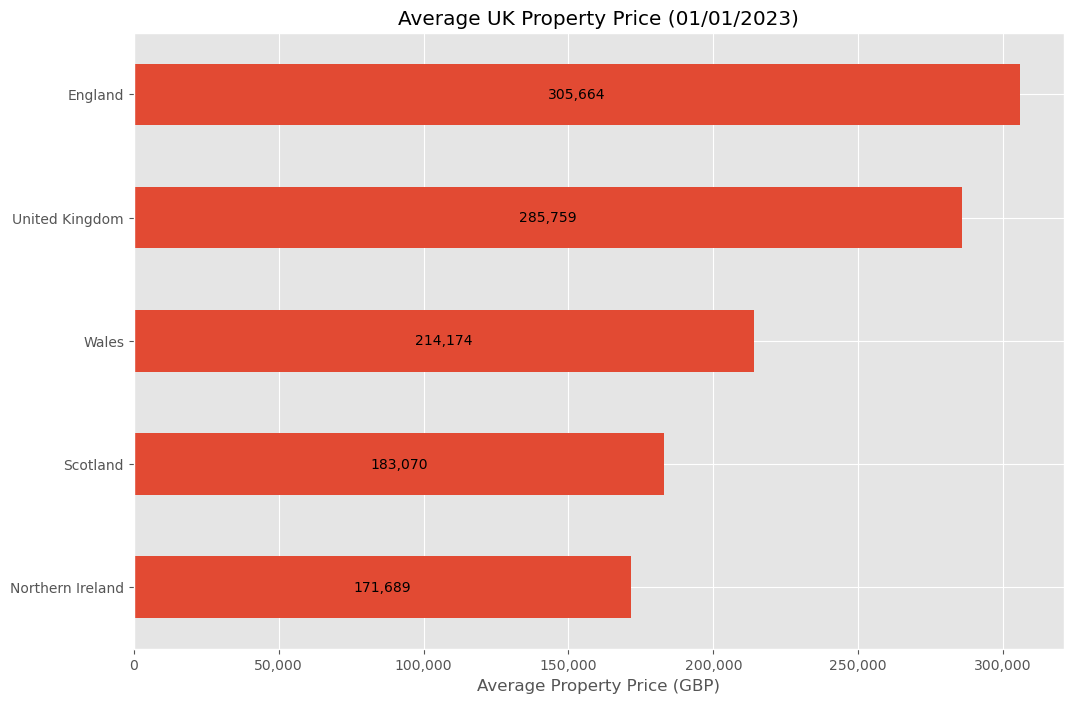

In [49]:
barh_prices_by_region('01/01/2023')

Property prices in England are higher the the national average - which may indicate a more serious struggle for housing in comparison to other countries.

Now let's look at the relationship between average annual wages and the average house prices.

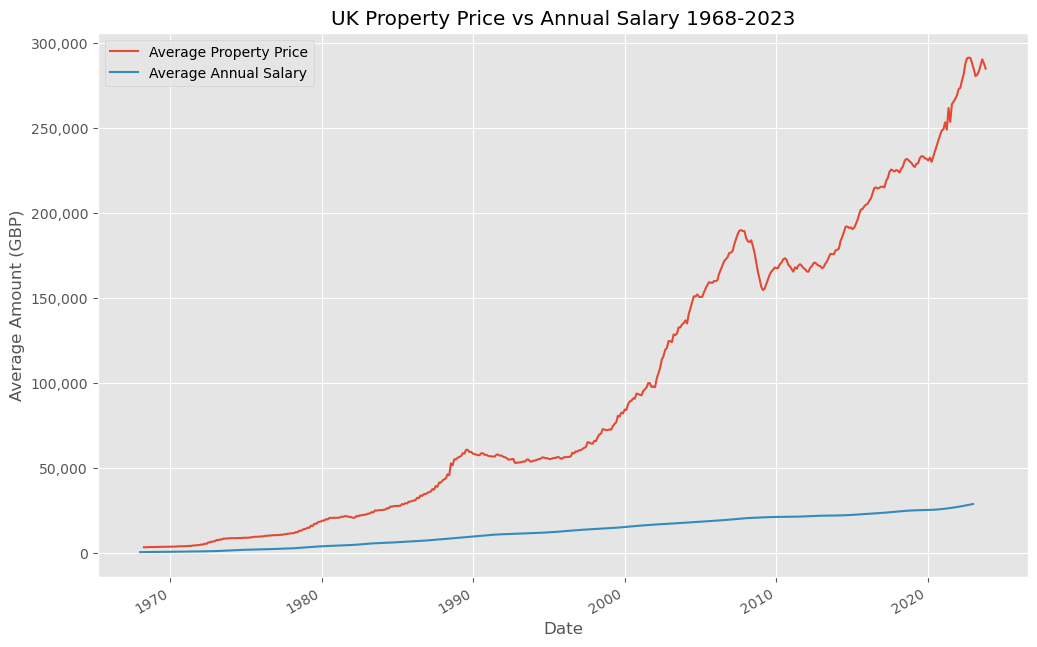

In [50]:
wages_interpolated = interpolate_series(df_wages.set_index('Date')['Average_Salary'])

ax = uk_interpolated.plot(kind='line',
                          label='Average Property Price',
                          title='UK Property Price vs Annual Salary 1968-2023',
                          figsize=(12,8),
                          legend=True)
wages_interpolated.plot(ax=ax, label='Average Annual Salary', legend=True)

ax.set_xlabel('Date')
ax.set_ylabel('Average Amount (GBP)')
ax.get_yaxis().set_major_formatter(mtick.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.show()

Our visualisation clearly shows the massive disparity between the cost of a home and a normal salary for the UK population. This is compelling data to argue that the difficulty of buying a home has increased. We can clearly see the rate of wage growth is nowhere near the rate of property price growth.

Again, let's focus on the years of 1976 and 2023 to draw a direct comparison.

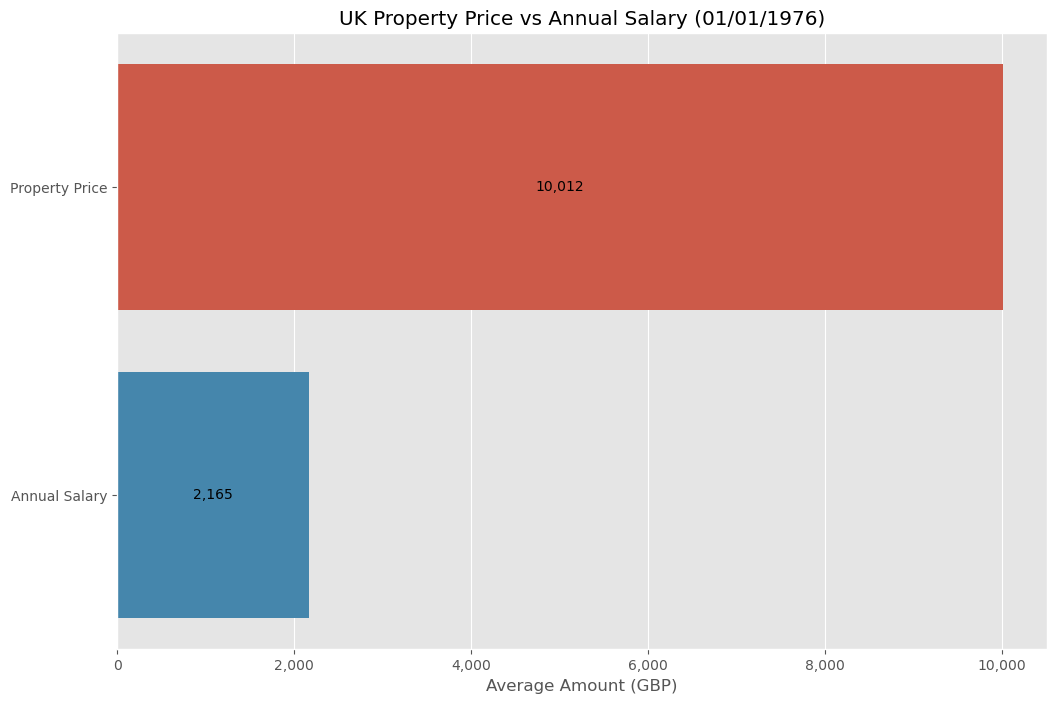

In [51]:
#filtering housing data by UK then merging with wage data
df_uk_price_salary = pd.merge(df_housing.query('Region_Name == "United Kingdom"'),
                              df_wages,
                              on='Date')

#writing function to plot based on date input
def barh_price_salary(date):
    
    plt.figure(figsize=(12, 8))
    ax = sns.barplot(data=df_uk_price_salary.loc[(df_uk_price_salary['Date'] == date)],
                     orient='h')
    
    ax.set(xlabel='Average Amount (GBP)', ylabel='', title=f'UK Property Price vs Annual Salary ({date})')
    ax.bar_label(ax.containers[0], label_type='center', fmt='{:,.0f}')
    ax.get_xaxis().set_major_formatter(mtick.FuncFormatter(lambda x, p: format(int(x), ',')))
    ax.set_yticklabels(['Property Price', 'Annual Salary'])
    plt.show()

barh_price_salary('01/01/1976')

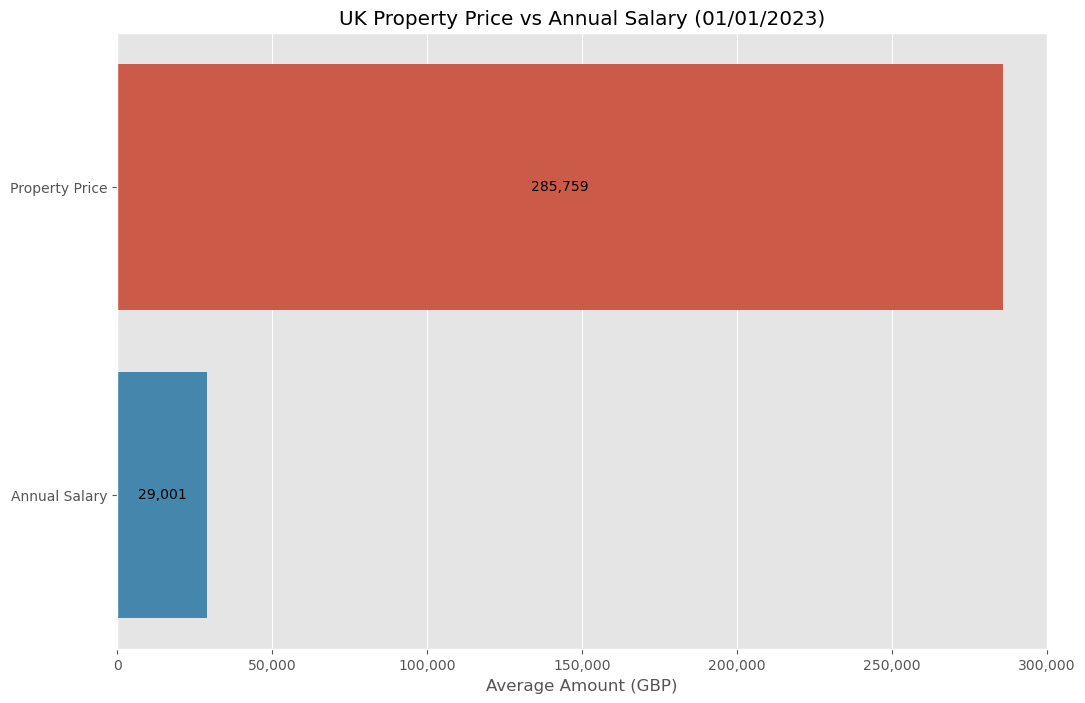

In [52]:
barh_price_salary('01/01/2023')

With these horizontal bar plots you can cleary see the reduction in the proprtion of average annual salary to property price.

# 6. Asking questions about our data🤷‍♂️
- Trying to answer some questions about our data using a plot or statistics

1. What are the top 10 most expensive regions of the UK in 2023?
2. What are the top 10 least expensive regions of the UK in 2023?
3. What are the top 10 regions with the highest growth in yearly mean property price from 2022 to 2023?

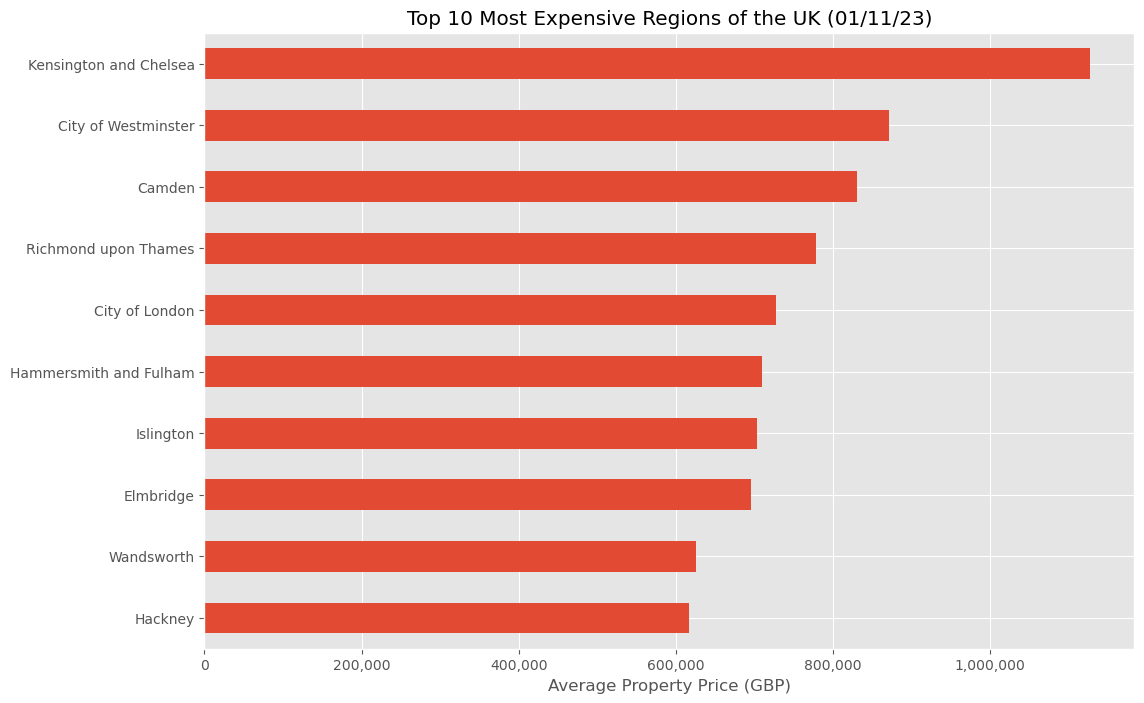

In [53]:
ax = df_housing.loc[(df_housing['Date'] == '2023-11-01')] \
    .sort_values('Average_Price', ascending=False) \
    .head(10) \
    .sort_values('Average_Price') \
    .plot(kind='barh',
          x='Region_Name',
          y='Average_Price',
          figsize=(12, 8),
          title='Top 10 Most Expensive Regions of the UK (01/11/23)',
          legend=None)

ax.set_xlabel('Average Property Price (GBP)')
ax.set_ylabel(None)
ax.get_xaxis().set_major_formatter(mtick.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.show()

Top 7 regions are all in the London area. This may indicate a higher difficulty in purchasing a house for residents here.

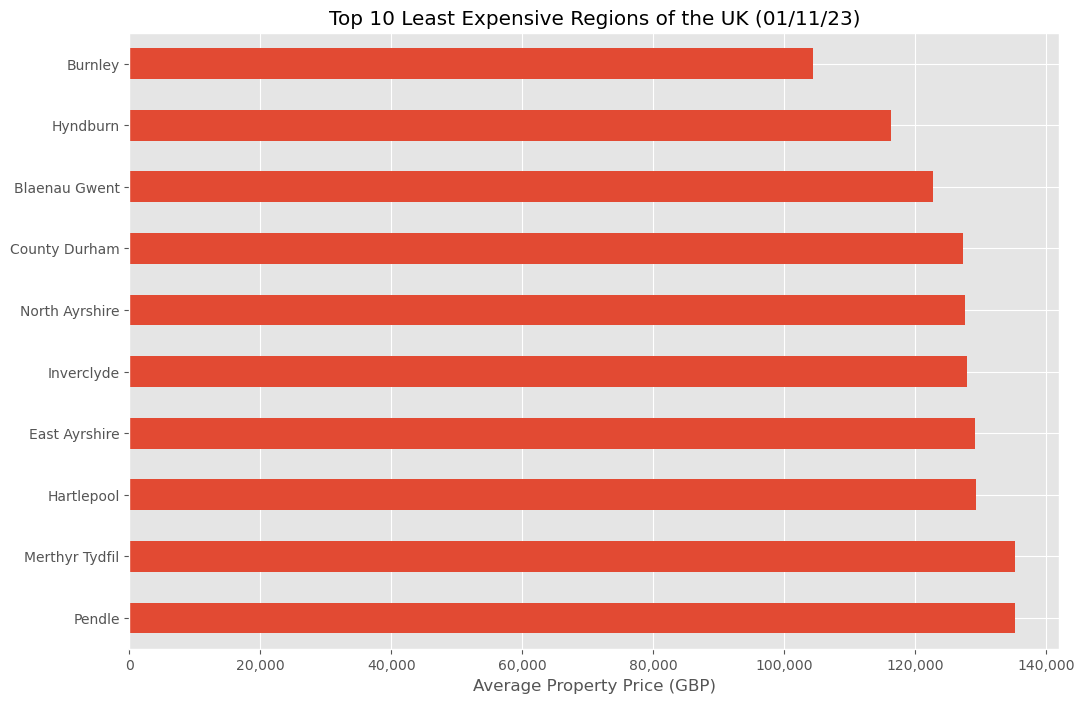

In [54]:
ax = df_housing.loc[(df_housing['Date'] == '2023-11-01')] \
    .sort_values('Average_Price') \
    .head(10) \
    .sort_values('Average_Price', ascending=False) \
    .plot(kind='barh',
          x='Region_Name',
          y='Average_Price',
          figsize=(12, 8),
          title='Top 10 Least Expensive Regions of the UK (01/11/23)',
          legend=None)

ax.set_xlabel('Average Property Price (GBP)')
ax.set_ylabel(None)
ax.get_xaxis().set_major_formatter(mtick.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.show()

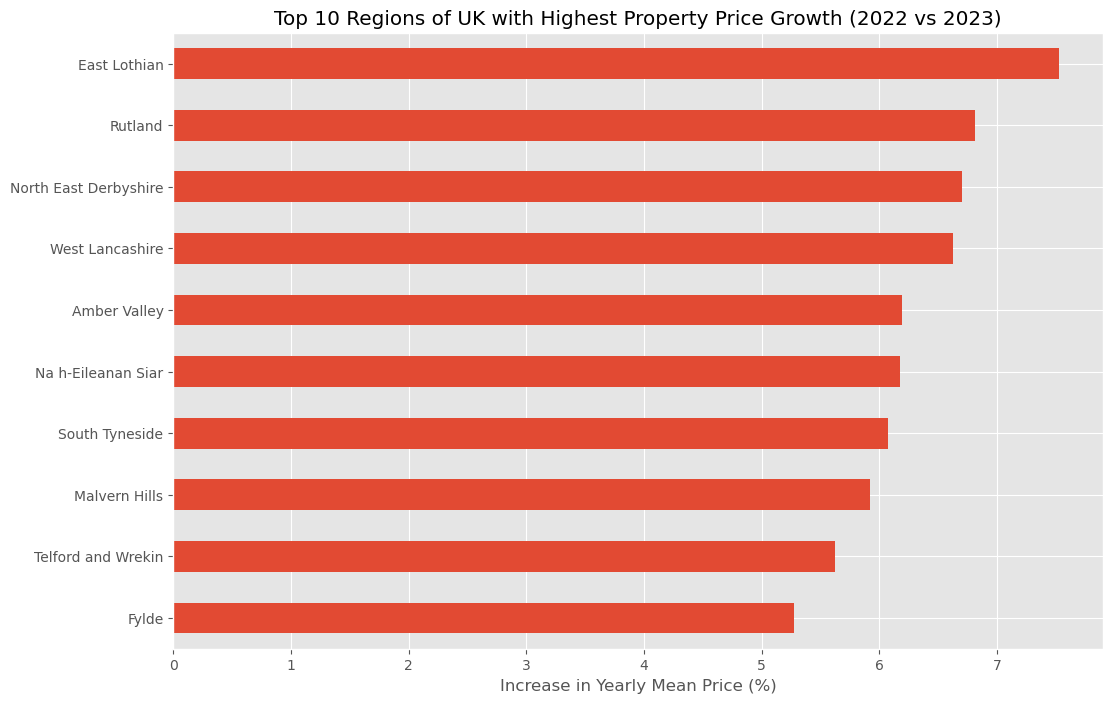

In [55]:
#create filtered dfs
df_2022 = df_housing.query('Date >= "2022-01-01" and Date <= "2022-12-31"') \
    .groupby('Region_Name', as_index=False)['Average_Price'].mean() \
    .rename(columns={'Average_Price': 'Average_Price_22'}).copy()

df_2023 = df_housing.query('Date >= "2023-01-01" and Date <= "2023-12-31"') \
    .groupby('Region_Name', as_index=False)['Average_Price'].mean() \
    .rename(columns={'Average_Price': 'Average_Price_23'}).copy()

#merge and calculate percentage change between mean 22 and 23 prices
df_pct_change = pd.merge(df_2022, df_2023, on='Region_Name')

df_pct_change['Pct_Change'] = df_pct_change[['Average_Price_22','Average_Price_23']] \
    .pct_change(axis='columns')['Average_Price_23']*100

#plot
ax = df_pct_change.sort_values('Pct_Change', ascending=False) \
    .head(10) \
    .sort_values('Pct_Change') \
    .plot(kind='barh',
          x='Region_Name',
          y='Pct_Change',
          figsize=(12, 8),
          title='Top 10 Regions of UK with Highest Property Price Growth (2022 vs 2023)',
          legend=None)

ax.set_xlabel('Increase in Yearly Mean Price (%)')
ax.set_ylabel(None)
plt.show()

# Conclusion👋

That's all for now!

We read in our data and got an initial feel for how it was structured and its quality. Then we performed some validation checks and cleaning to prepare it for our analysis. We then performed univariate analysis, looking at the distribution of house prices across regions for the years 1976 and 2023. We then moved on to multivariate analysis, plotting the change of mean property price and salary across time. We discovered a growing discrepancy between how much Britons are paid and the cost of a home in the UK. We finished our analysis looking at variations in property price across different regions, with England and London standing out as the most expensive areas.

If you are interested in a further breakdown of prices per year/region, take a look at my [interactive Tableau field map](https://public.tableau.com/app/profile/mark.strathie/viz/shared/R7JH5NRCG). You are able to filter per year and see the variation in average property price per UK region. Here's a screenshot of the data from 2023:

<table><tr>
<td><a href='https://public.tableau.com/app/profile/mark.strathie/viz/shared/R7JH5NRCG'><img src="img/tableau.png" alt="Tableau Field Map"/></a></td>
</tr></table>

To read more about the data story revealed by this EDA, see my article [How Difficult Is It to Buy a Home in the UK? A Data-Driven Opinion on the Housing Crisis](docs/housing_article.pdf).

Contains HM Land Registry data © Crown copyright and database right 2020. This data is licensed under the Open Government Licence v3.0.